In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [630]:
df = pd.read_csv('laptops.csv')

In [631]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Data Preparation

In [633]:
#unify column names format
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [634]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## EDA

### Laptop Price

<Axes: xlabel='final_price', ylabel='Count'>

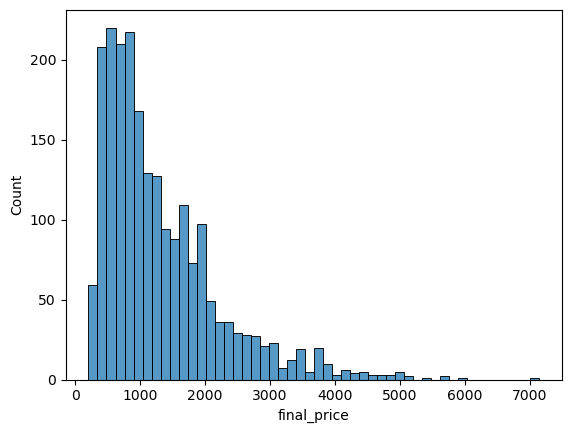

In [637]:
#Dependent variable to predict - final_price. Let's check its distribution
%matplotlib inline
sns.histplot(df.final_price, bins = 50) 

Distribution is left-skewed. Let's transform it logs:

<Axes: xlabel='final_price', ylabel='Count'>

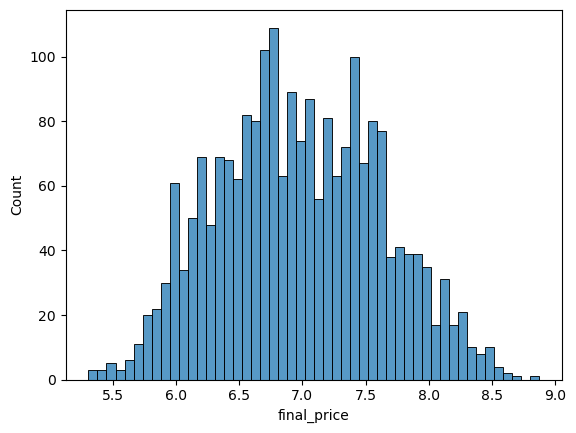

In [639]:
price_log = np.log1p(df.final_price)
#let's check distribution again

sns.histplot(price_log, bins = 50) 

Now the price is ~normally distributed 

### Missing Values

In [642]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

#storage_type, gpu, screen columns contain missing values

### RAM Variable

In [645]:
#variable types
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

RAM, Storage, Screen and Final Price are numerical varibles. What's the median (50% percentile) for variable 'ram'?

In [647]:
df['ram'].median()

16.0

## Preparing the datasets

20 test -20 validation -60 train

In [650]:
#first determine len of each dataset
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(432, 432, 1296)

In [651]:
#now we will shuffle the dataset so to get a random sample in each dataset
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [652]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [653]:
#resetting index
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [654]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [655]:
#let's prepare y array
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [656]:
len(y_train)

1296

In [657]:
#let's remove y variable from feature matrix
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Linear Regression Function

In [659]:
#defining linear regression function
def train_linear_regression(X, y):
    ones  = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred #рассчитываем разницу (ошибку)
    se = error**2 #возводим ошибку в квадрат
    mse = se.mean() #находим средний квадрат ошибки
    return np.sqrt(mse) #берем корень из средней ошибки

## Training with Numerical Values only

In [661]:
#выберем фичи для старта
df_train.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
dtype: object

In [662]:
base = ['ram', 'storage', 'screen']

## Dealing with missing values

In [664]:
df_train[base].isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

#### Option 1: filling with 0

In [666]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0) #filling with 0s
    X = df_num.values
    return X

In [667]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w) #predicting
rmse(y_val, y_pred)

597.3635593619621

#### Option 2: filling with mean

In [669]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean()) #filling with mean
    X = df_num.values
    return X

In [670]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w) #predicting
rmse(y_val, y_pred)

597.7391912416755

## Regularization

In [672]:
#Here we would fillna with 0s
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [673]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [702]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 597.3635593619621
  0.01 597.361681985601
   0.1 597.3451592963619
     1 597.2121215589518
     5 597.0111186297034
    10 597.0587680661116
   100 597.9032640603045


In [625]:
#5 597.0111186297034 - best reg coeff

### Q6

In [704]:
#Split the dataset like previously, use seed 9.
#Combine train and validation datasets.
#Fill the missing values with 0 and train a model with r=0.001.
#What's the RMSE on the test dataset?

In [706]:
#now we will shuffle the dataset so to get a random sample in each dataset
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [708]:
#resetting index
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

#let's prepare y array
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

#let's remove y variable from feature matrix
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [710]:
df_full_train = pd.concat([df_train, df_val]) #combining train and validation dfs
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,MSI Creator 15 A10SF-018ES Intel Core i7-10875...,Refurbished,MSI,Creator,Intel Core i7,32,1000,SSD,RTX 2070,15.6,No
1,Apple MacBook Air Apple M1/8GB/512GB SSD/GPU H...,New,Apple,MacBook Air,Apple M1,8,512,SSD,NaN,13.3,No
2,HP 250 G8 Intel Core i5-1135G7/8 GB/512 GB SSD...,New,HP,250,Intel Core i5,8,512,SSD,NaN,15.6,No
3,ASUS ROG Strix G17 G713RS-LL042 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,32,1000,SSD,RTX 3080,17.3,No
4,MSI Prestige 16 A12UD-221XES Intel Core i7-128...,New,MSI,Prestige,Intel Core i7,16,1000,SSD,RTX 3050,16.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1723,ASUS VivoBook S OLED K3402ZA-KM079W Intel Evo ...,New,Asus,VivoBook,Intel Evo Core i7,16,512,SSD,NaN,14.0,No
1724,Lenovo ThinkBook 13x Intel Evo Core i5-1130G7/...,New,Lenovo,ThinkBook,Intel Evo Core i5,16,512,SSD,NaN,13.3,No
1725,Samsung Galaxy Book2 Intel Core i5-1235U/8GB/2...,New,Samsung,Galaxy Book,Intel Core i5,8,256,SSD,NaN,15.6,No
1726,MSI Alpha 15 A4DEK-006XES AMD Ryzen 7 4800H/16...,Refurbished,MSI,Alpha,AMD Ryzen 7,16,512,SSD,NaN,15.6,No


In [712]:
X_full = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [714]:
w_0, w = train_linear_regression_reg(X_full, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w) #predicting
rmse(y_test, y_pred)

610.9371321919082